<a href="https://colab.research.google.com/github/Suhaila-Hassan/Alzheimer-MRI-Classification/blob/main/Hand_Gesture_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [48]:
df = pd.read_csv('hand_landmarks_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,x5,y5,z5,x6,y6,z6,x7,y7,z7,x8,y8,z8,x9,y9,z9,x10,y10,z10,x11,y11,z11,x12,y12,z12,x13,y13,z13,x14,y14,z14,x15,y15,z15,x16,y16,z16,x17,y17,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,241.453918,0.005872,230.076668,243.947525,0.005236,238.130150,233.234192,0.000154,225.652794,247.249207,-0.003813,226.056931,255.866364,-0.006753,228.159897,260.384155,-0.007799,236.882492,238.052338,-0.004955,226.113327,252.712662,-0.010097,229.431679,260.451080,-0.014108,232.641357,265.248962,-0.016854,236.293053,244.317657,-0.009528,225.111259,256.214203,-0.016194,227.390144,263.649139,-0.020701,230.754410,268.069519,-0.023142,236.512527,251.706177,-0.013198,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,298.860626,-0.029252,94.470360,287.298767,-0.034743,108.349709,308.093719,-0.022332,126.623394,317.461853,-0.033495,120.436695,321.913879,-0.039811,113.516293,320.967957,-0.044990,112.661499,318.378937,-0.024038,126.470741,326.580048,-0.032438,119.046581,329.816071,-0.033811,114.183495,329.230194,-0.036610,115.033024,330.221741,-0.026222,129.401276,335.143341,-0.034942,123.797516,337.128418,-0.030081,118.561386,336.647949,-0.027561,116.245079,341.947784,-0.029042,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,209.035360,-0.020580,214.772873,196.609588,-0.029497,227.154053,225.576852,-0.016897,245.390419,237.862886,-0.023851,239.404152,244.408742,-0.024241,232.023811,244.865198,-0.024215,229.581985,237.329024,-0.025533,245.673843,248.809410,-0.029864,238.769005,254.638094,-0.027649,231.852882,253.995576,-0.027500,230.325073,251.093664,-0.033584,246.591980,260.490353,-0.038898,240.098305,265.280085,-0.033344,233.025467,264.505473,-0.030234,230.100174,265.584175,-0.041256,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,301.874115,-0.015029,116.766609,294.977814,-0.019514,129.777031,308.501129,-0.010413,139.635818,310.151733,-0.016497,136.397449,312.745758,-0.020082,131.874081,313.205322,-0.023151,132.963112,315.039551,-0.014133,141.762932,315.943848,-0.018309,138.536854,317.723969,-0.019228,134.968494,319.064636,-0.021387,134.844761,322.039795,-0.017837,143.293087,322.025909,-0.021707,140.613567,323.325195,-0.018406,137.043560,324.407806,-0.017291,135.485836,329.050110,-0.021804,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,98.687691,-0.013397,188.239563,90.394289,-0.017483,202.827484,110.826588,-0.013008,219.390350,112.392162,-0.019843,215.733658,117.425114,-0.022405,210.229782,118.631218,-0.024263,206.339752,118.629364,-0.016029,221.155609,120.211258,-0.021682,217.215561,124.373337,-0.022350,212.064911,125.186268,-0.023731,209.829666,126.978264,-0.018826,223.595139,127.696289,-0.023907,219.652115,130.917194,-0.020978,214.071228,131.502628,-0.019323,213.105820,135.293209,-0.021623,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


# Data Exploration

In [49]:
df.shape

(25675, 64)

In [50]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [51]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,x5,y5,z5,x6,y6,z6,x7,y7,z7,x8,y8,z8,x9,y9,z9,x10,y10,z10,x11,y11,z11,x12,y12,z12,x13,y13,z13,x14,y14,z14,x15,y15,z15,x16,y16,z16,x17,y17,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517395,252.115322,-0.009465,202.862981,240.645966,-0.015946,203.025267,231.684450,-0.022772,202.966979,226.269003,-0.029150,202.748369,226.255575,-0.011015,203.047902,213.496471,-0.023341,203.025185,206.581444,-0.031587,202.939537,200.498964,-0.036539,202.332967,226.209064,-0.014324,202.520204,213.070576,-0.026699,202.481818,207.660820,-0.033022,202.434025,202.627671,-0.035749,202.027209,229.245052,-0.018841,202.177061,220.038483,-0.032494,202.211731,220.993717,-0.034022,202.232146,221.068921,-0.032048,201.721609,234.378377,-0.024129,201.792374,227.455597,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384691,0.010376,80.412089,74.721921,0.013973,79.647588,74.923091,0.017201,80.777001,75.433577,0.020555,81.486053,74.174662,0.011410,78.660264,75.193943,0.016304,77.695517,76.414925,0.019864,77.304606,77.817092,0.022231,85.044490,74.757306,0.012105,84.003401,76.411499,0.018234,83.878024,78.804974,0.020896,83.966876,81.326327,0.022003,89.052866,75.530619,0.013458,89.047221,76.805159,0.020278,88.354398,78.553745,0.021083,88.068275,80.635173,0.021304,93.354905,76.412992,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489950,-0.155846,23.446341,38.851536,-0.223258,13.243541,19.964561,-0.282578,23.007730,41.025543,-0.176002,7.846868,12.058107,-0.242614,24.513308,27.764654,-0.279875,20.750772,11.701990,-0.302675,26.686532,38.545681,-0.178811,11.681391,17.029541,-0.230100,21.732645,24.313637,-0.269950,12.205227,9.170517,-0.282490,18.742111,35.284714,-0.170851,8.862213,15.022144,-0.271215,11.509277,21.557108,-0.278481,13.415025,11.011627,-0.253293,4.522356,30.686922,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815950,-5.243216e-08,130.535929,197.999625,-0.015199,136.711035,187.018583,-0.023020,138.905817,177.897360,-0.030877,139.830317,172.346912,-0.038417,135.349077,173.119514,-0.016189,139.631676,160.014862,-0.030574,141.088646,151.965836,-0.040268,141.518023,144.926865,-0.046269,131.467953,172.890533,-0.019602,133.723944,158.572586,-0.034752,134.446735,151.556170,-0.042468,134.941040,145.513020,-0.045741,128.587727,175.506911,-0.024630,130.301594,165.454178,-0.041456,130.504211,165.620058,-0.043919,130.167824,164.591892,-0.042403,126.202721,180.296774,-0.030728,126.828913,172.720392,-0.042726,126.887403,172.345467,-0.041957,126.356627,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979530,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,226.828033,-0.020179,200.140117,221.246796,-0.025666,199.457932,221.213181,-0.009502,199.514259,208.351471,-0.020488,199.270821,201.778839,-0.027943,199.146263,195.717651,-0.032342,199.286728,220.864047,-0.012345,199.699150,20

In [52]:
# Find columns containing nulls values and their counts
df.isnull().sum()[df.isnull().sum() > 0]

,0


In [53]:
# Find duplicate rows values and their counts
df.duplicated().sum()[df.duplicated().sum() > 0]

array([], dtype=int64)

In [54]:
print(f'Number of Unique Gestures: {len(df.label.unique())}')
print(f'Gestures:\n{df.label.unique()}')

Number of Unique Gestures: 18
Gestures:
['call' 'dislike' 'fist' 'four' 'like' 'mute' 'ok' 'one' 'palm' 'peace'
 'peace_inverted' 'rock' 'stop' 'stop_inverted' 'three' 'three2' 'two_up'
 'two_up_inverted']


In [55]:
df.label.value_counts()

,count
label,
three2,1653
palm,1649
four,1634
ok,1592
stop_inverted,1567
call,1506
peace_inverted,1497
stop,1482
rock,1458


In [56]:
df.label.value_counts(normalize=True)

,proportion
label,
three2,0.064382
palm,0.064226
four,0.063642
ok,0.062006
stop_inverted,0.061032
call,0.058656
peace_inverted,0.058306
stop,0.057722
rock,0.056787


# Data Visualization

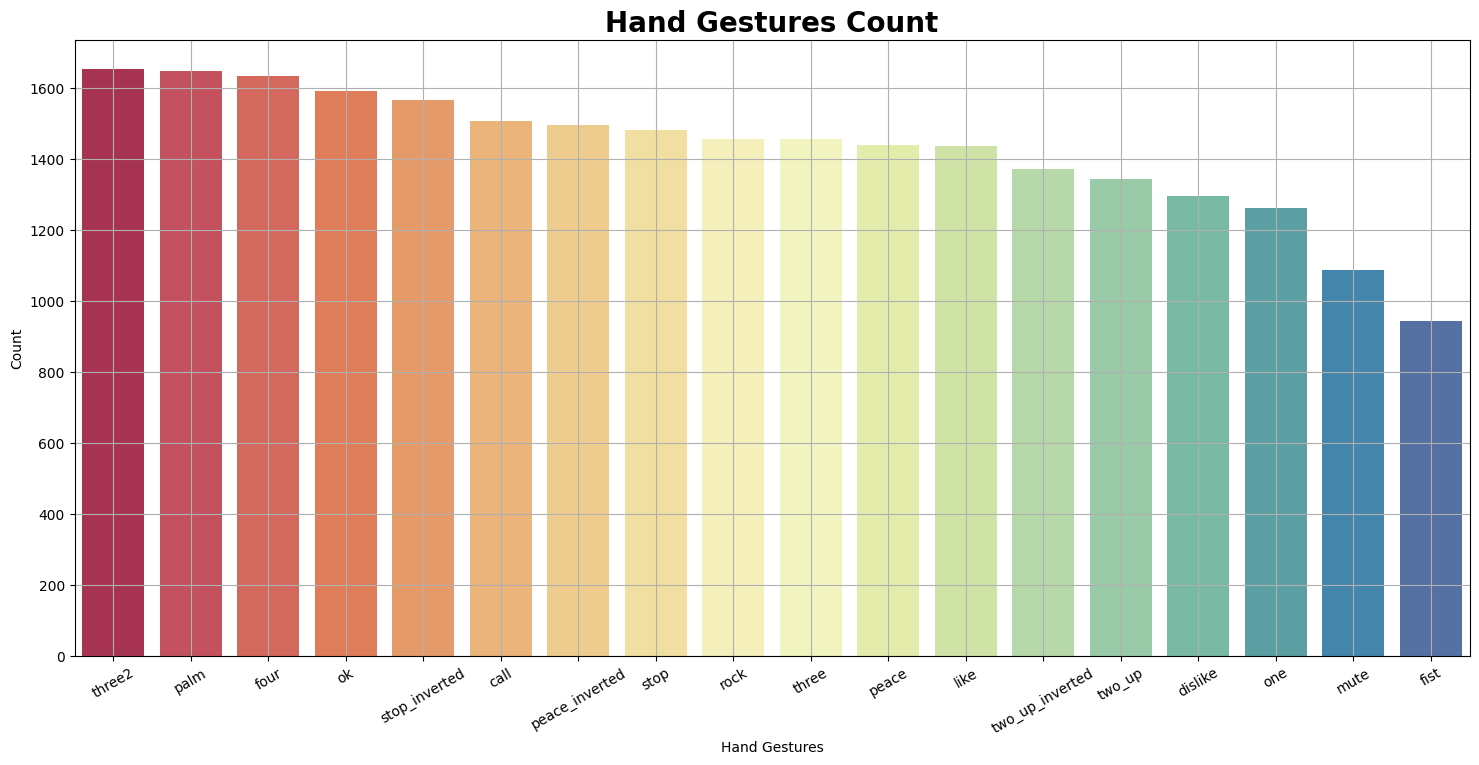

In [57]:
label_order = df['label'].value_counts().index

plt.figure(figsize=(18, 8))
sns.countplot(data=df, x='label', order=label_order, palette='Spectral')
plt.title('Hand Gestures Count', fontsize=20, fontweight='bold')
plt.xlabel('Hand Gestures')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.grid()
plt.show()

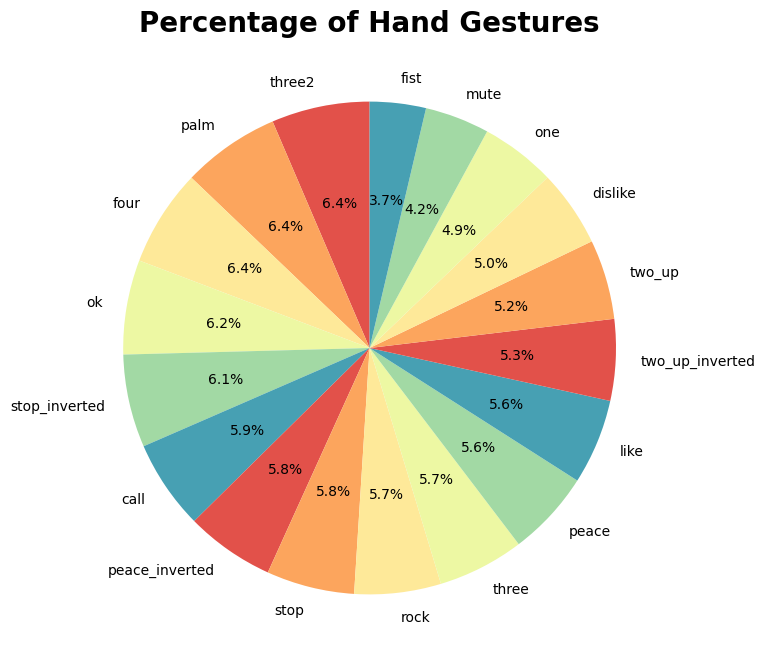

In [58]:
label_counts = df['label'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Spectral'))
plt.title('Percentage of Hand Gestures', fontsize=20, fontweight='bold')
plt.show()

In [59]:
def plot_hand_gestures(df):

    # Get unique hand gestures
    unique_hand_gestures = df.drop_duplicates(subset="label", keep="first")

    # Define hand landmark connections
    connections = [
        (0, 1), (1, 2), (2, 3), (3, 4),  # Thumb
        (0, 5), (5, 6), (6, 7), (7, 8),  # Index Finger
        (5, 9), (9, 10), (10, 11), (11, 12),  # Middle Finger
        (9, 13), (13, 14), (14, 15), (15, 16),  # Ring Finger
        (13, 17), (17, 18), (18, 19), (19, 20),  # Pinky
        (0, 17)  # Wrist to pinky
    ]

    # Loop through unique gestures
    for index, gesture in zip(unique_hand_gestures.index, unique_hand_gestures.label.unique()):
        row = df.iloc[index]
        num_points = len(unique_hand_gestures.columns) // 3

        # Extract X and Y coordinates
        x_coords = [row[f"x{i}"] for i in range(1, num_points + 1)]
        y_coords = [-row[f"y{i}"] for i in range(1, num_points + 1)] # Flip y

        # Create a 2D plot
        sns.scatterplot(x=x_coords, y=y_coords, color="blue", s=50)

        # Draw connections between landmarks
        for start, end in connections:
            plt.plot([x_coords[start], x_coords[end]],
                     [y_coords[start], y_coords[end]],
                     "red", linewidth=2)

        # Label and show plot
        plt.title(f"Gesture: {gesture}", fontsize=14, fontweight='bold')
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.grid()
        plt.tight_layout()
        plt.show()

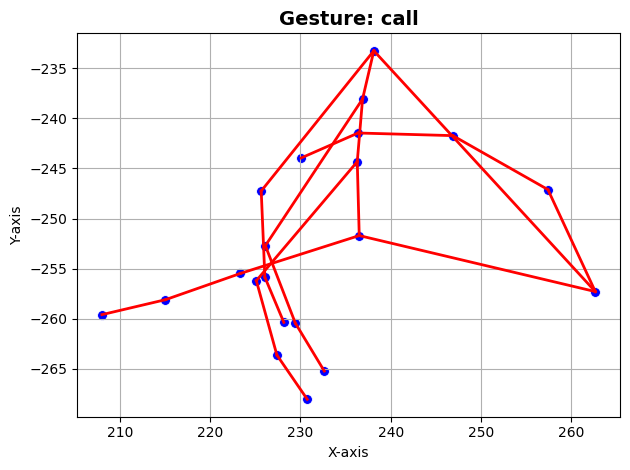

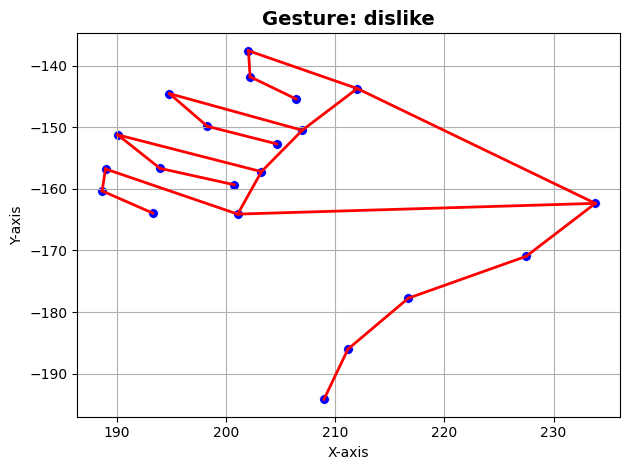

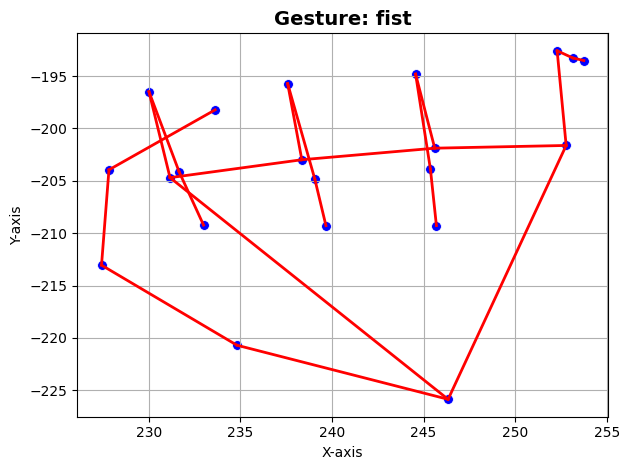

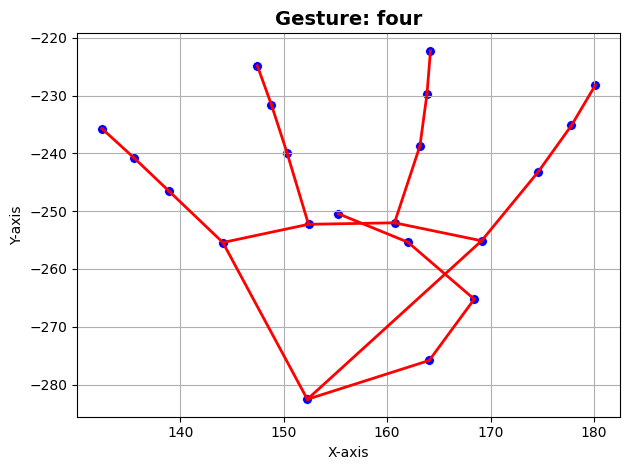

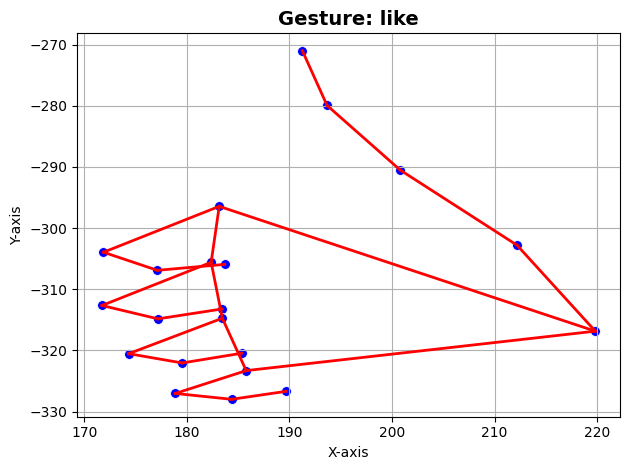

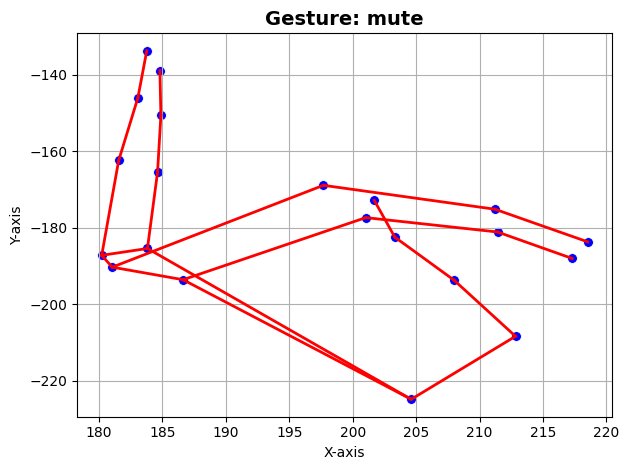

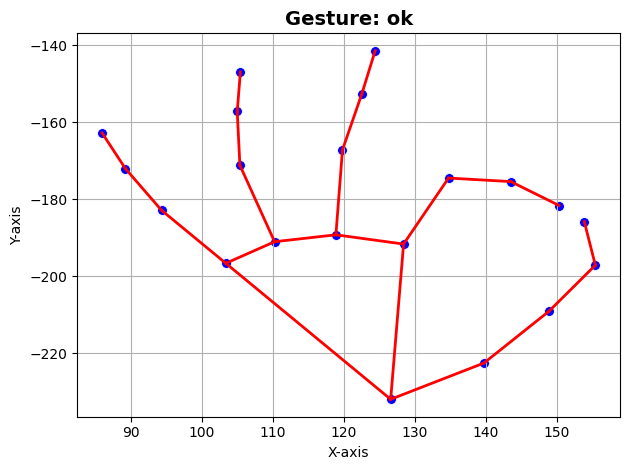

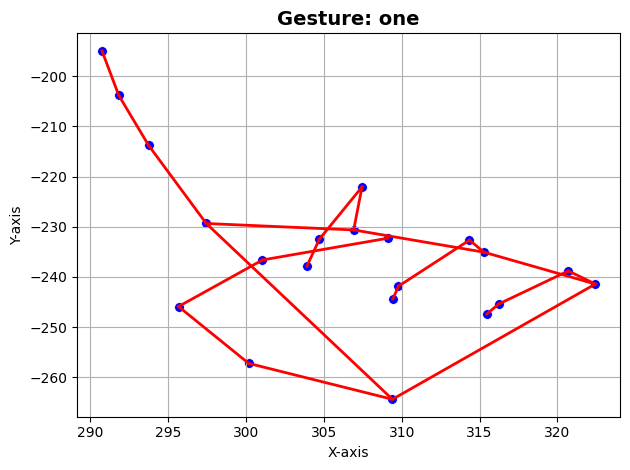

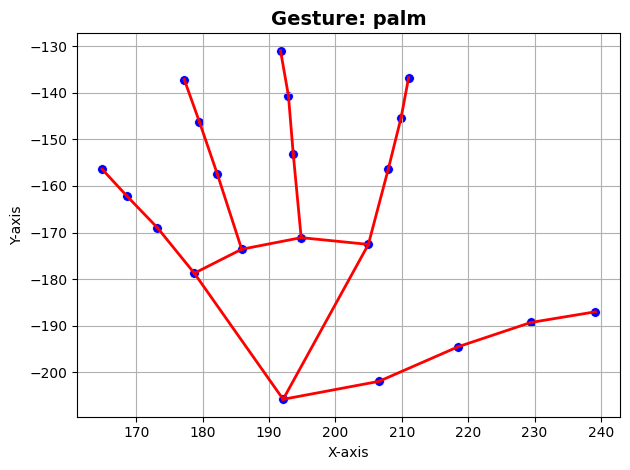

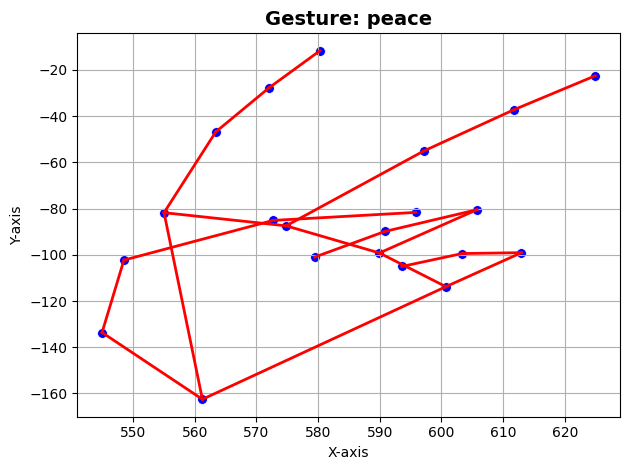

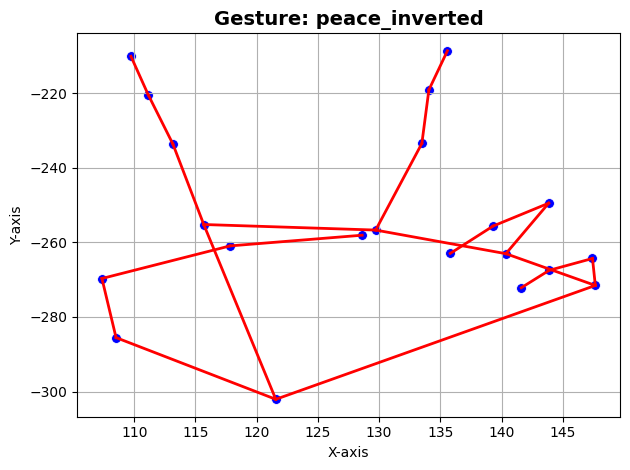

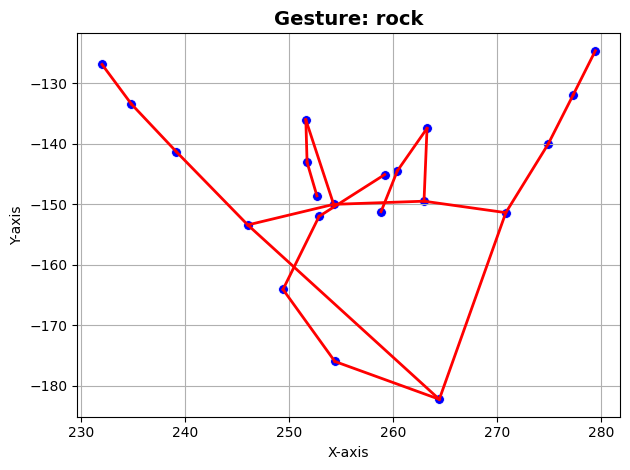

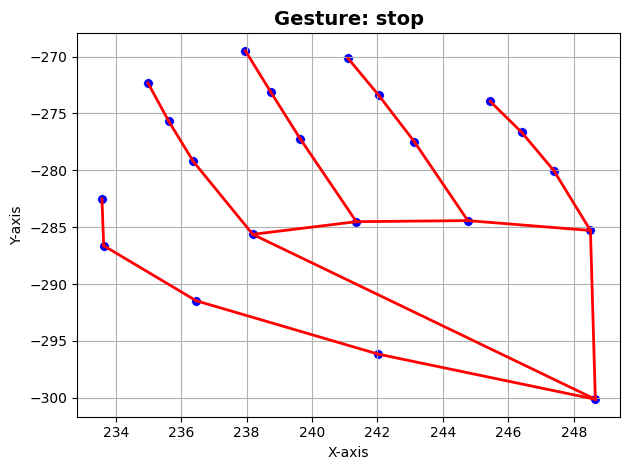

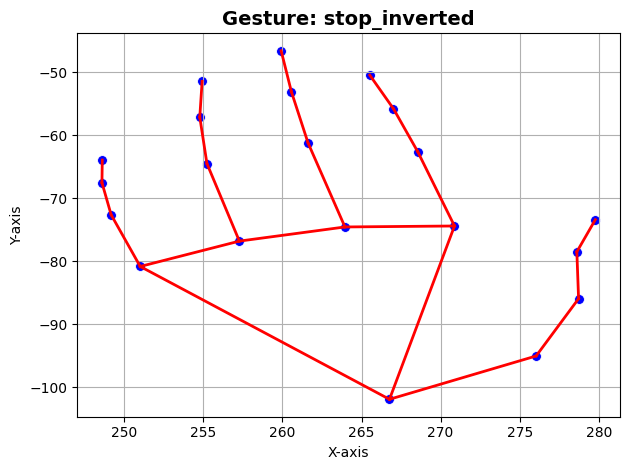

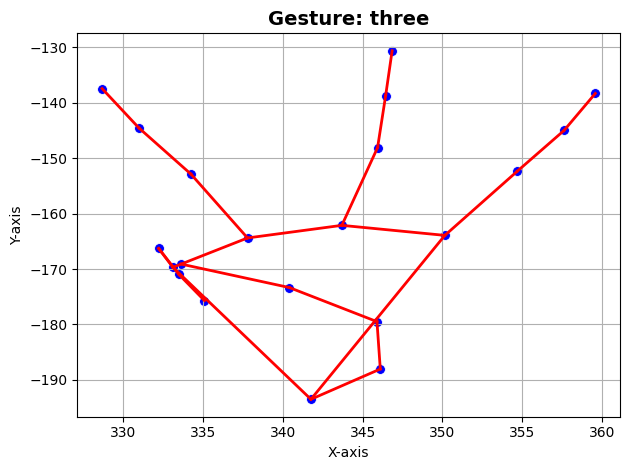

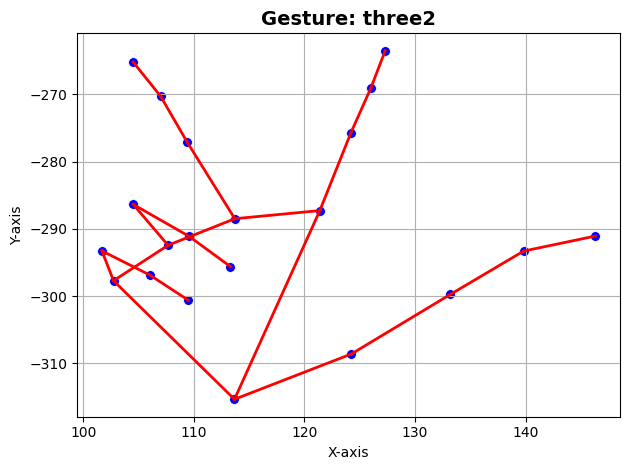

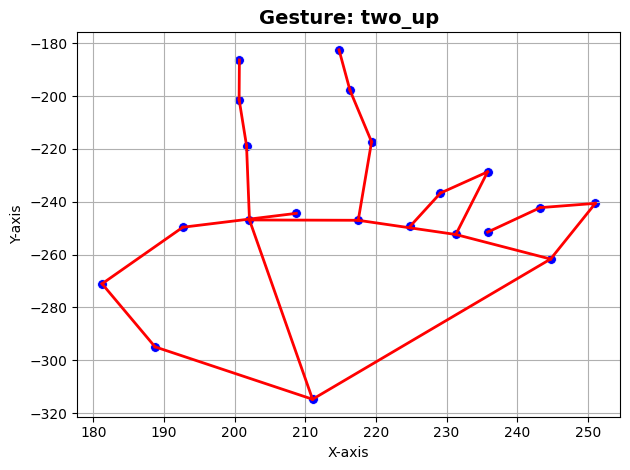

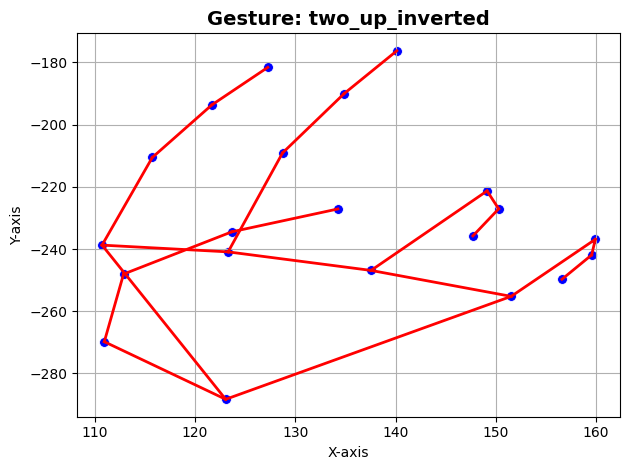

In [60]:
plot_hand_gestures(df)

# Data Preprocessing

In [61]:
features = df.drop('label', axis=1)
labels = df['label']

## Feature Normalization
1. Subtract wrist (X, Y) coordinate from all other (X, Y) coordinates to make the wrist point the origin point.
2. Divide all (X, Y) coordinates by middle finger tip point (X, Y).

In [62]:
features_scaled = features.copy()

# Extract wrist and mid-finger tip (X, Y) coordinates
wrist_x = features['x1']
wrist_y = features['y1']
mid_finger_x = features['x13']
mid_finger_y = features['y13']

# Normalize (X, Y) coordinates
for col in features.columns:
    if 'x' in col:
        features_scaled[col] = (features[col] - wrist_x) / abs(mid_finger_x - wrist_x)
    elif 'y' in col:
        features_scaled[col] = (features[col] - wrist_y) / abs(mid_finger_y - wrist_y)
    else:
        features_scaled[col] = features[col]

In [63]:
features_scaled.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,x5,y5,z5,x6,y6,z6,x7,y7,z7,x8,y8,z8,x9,y9,z9,x10,y10,z10,x11,y11,z11,x12,y12,z12,x13,y13,z13,x14,y14,z14,x15,y15,z15,x16,y16,z16,x17,y17,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
0,0.0,0.0,-3.649205e-07,-0.174914,-1.283455,0.004224,-0.525732,-1.962230,0.005798,-0.875346,-1.995325,0.005872,-1.085408,-1.681429,0.005236,-0.817215,-3.030026,0.000154,-1.232730,-1.265813,-0.003813,-1.219272,-0.181083,-0.006753,-1.149240,0.387617,-0.007799,-0.858764,-2.423516,-0.004955,-1.217394,-0.578072,-0.010097,-1.106887,0.396042,-0.014108,-1.0,1.0,-0.016854,-0.878393,-1.634837,-0.009528,-1.250764,-0.137297,-0.016194,-1.174874,0.798614,-0.020701,-1.062838,1.355052,-0.023142,-0.871084,-0.704769,-0.013198,-1.309580,-0.228373,-0.020450,-1.586041,0.101943,-0.024577,-1.820383,0.289999,-0.026722
1,0.0,0.0,-2.345265e-07,-0.046275,-1.039684,-0.011102,0.218228,-2.051461,-0.021096,0.398617,-2.804606,-0.029252,0.360622,-3.491629,-0.034743,0.810786,-2.255962,-0.022332,1.403477,-1.699293,-0.033495,1.202817,-1.434747,-0.039811,0.978360,-1.490955,-0.044990,0.950635,-1.644798,-0.024038,1.398526,-1.157476,-0.032438,1.157730,-0.965186,-0.033811,1.0,-1.0,-0.036610,1.027554,-0.941081,-0.026222,1.493576,-0.648632,-0.034942,1.311822,-0.530675,-0.030081,1.141993,-0.559226,-0.027561,1.066866,-0.244301,-0.029042,1.592511,-0.253414,-0.038175,1.927295,-0.191923,-0.037336,2.240547,-0.180827,-0.036136
2,0.0,0.0,-2.417307e-07,0.174701,-3.001556,-0.000184,0.442276,-5.859238,-0.009687,0.627193,-8.205259,-0.020580,0.612662,-10.196596,-0.029497,0.893441,-5.554344,-0.016897,1.307002,-3.585402,-0.023851,1.171247,-2.536372,-0.024241,1.003876,-2.463221,-0.024215,0.948501,-3.670958,-0.025533,1.313430,-1.831127,-0.029864,1.156843,-0.897031,-0.027649,1.0,-1.0,-0.027500,0.965353,-1.465056,-0.033584,1.334251,0.040844,-0.038898,1.186988,0.808439,-0.033344,1.026592,0.684301,-0.030234,0.960252,0.857172,-0.041256,1.418364,1.340955,-0.044068,1.693313,1.769438,-0.040469,1.932900,1.928990,-0.038301
3,0.0,0.0,-1.233261e-07,-0.023670,-0.881455,-0.002824,0.083031,-1.716993,-0.008911,0.135474,-2.371993,-0.015029,0.089532,-2.922393,-0.019514,0.740320,-1.843084,-0.010413,1.233462,-1.711348,-0.016497,1.071477,-1.504316,-0.020082,0.845216,-1.467638,-0.023151,0.899690,-1.321246,-0.014133,1.339861,-1.249073,-0.018309,1.178491,-1.107000,-0.019228,1.0,-1.0,-0.021387,0.993811,-0.762550,-0.017837,1.416400,-0.763658,-0.021707,1.282369,-0.659961,-0.018406,1.103796,-0.573556,-0.017291,1.025878,-0.203049,-0.021804,1.511558,-0.178513,-0.027622,1.804565,-0.150196,-0.027863,2.051525,-0.163246,-0.027723
4,0.0,0.0,-1.622995e-07,-0.011791,-0.833076,-0.002884,0.136985,-1.856973,-0.008115,0.161465,-2.601936,-0.013397,-0.023882,-3.103302,-0.017483,0.603026,-1.868095,-0.013008,1.314807,-1.773450,-0.019843,1.157663,-1.469190,-0.022405,0.921136,-1.396277,-0.024263,0.753964,-1.396389,-0.016029,1.390668,-1.300757,-0.021682,1.221347,-1.049145,-0.022350,1.0,-1.0,-0.023731,0.903942,-0.891667,-0.018826,1.495506,-0.848260,-0.023907,1.326056,-0.653545,-0.020978,1.086220,-0.618153,-0.019323,1.044733,-0.388999,-0.021623,1.628780,-0.572171,-0.025113,1.978393,-0.667633,-0.024087,2.268730,-0.801052,-0.023486


## Encode Labels

In [64]:
encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)
np.unique(encoded_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [65]:
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

## Split dataset

In [66]:
X_train, X_val, y_train, y_val = train_test_split(features_scaled, encoded_labels, test_size=0.2, stratify=encoded_labels, random_state=42, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((20540, 63), (5135, 63), (20540,), (5135,))

# Model Training

In [67]:
def model_grid_search(model, param_grid, X_train, y_train):
    """
    Performs grid search to find the best combination of hyperparameters
    """

    grid_search = GridSearchCV(estimator=model,
                               param_grid=param_grid,
                               n_jobs=-1,
                               refit=True)

    grid_search.fit(X_train, y_train)
    print(f'Best Parameters: {grid_search.best_params_}')

    return grid_search.best_estimator_

In [ ]:
def model_random_search(model, param_grid, X_train, y_train):
    """
    Performs random search to find the best combination of hyperparameters
    """

    random_search = RandomizedSearchCV(estimator=model,
                                       param_distributions=param_grid,
                                       scoring='accuracy',
                                       n_iter=10,
                                       cv=5,
                                       n_jobs=-1,
                                       refit=True)

    random_search.fit(X_train, y_train)
    print(f'Best Parameters: {random_search.best_params_}')

    return random_search.best_estimator_

## SVM

In [23]:
svm_model = SVC()
svm_param_grid = {'kernel': ['rbf'],
                  'C': [0.1, 1, 10, 100],
                  'gamma': [0.01, 0.1, 1, 10, 100]
                  }

svm_best_model = model_grid_search(svm_model, svm_param_grid, X_train, y_train)

KeyboardInterrupt: 

In [ ]:
svm_pred = svm_best_model.predict(X_val)

In [ ]:
print(f'Acccuracy: {accuracy_score(y_val, svm_pred)}')
print(f'F1 Score: {f1_score(y_val, svm_pred, average="weighted")}')
print(f'Precision: {precision_score(y_val, svm_pred, average="weighted")}')
print(f'Recall: {recall_score(y_val, svm_pred, average="weighted")}')
print(f'Score: {svm_model.score(X_train, y_train)}')

In [ ]:
joblib.dump(svm_best_model, 'svm_model.pkl')

## Random Forest

In [ ]:
rf_model = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [100, 150, 200],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf_best_model = model_grid_search(rf_model, rf_param_grid, X_train, y_train)

In [ ]:
rf_pred = rf_best_model.predict(X_val)

In [ ]:
print(f'Acccuracy: {accuracy_score(y_val, rf_pred)}')
print(f'F1 Score: {f1_score(y_val, rf_pred, average="weighted")}')
print(f'Precision: {precision_score(y_val, rf_pred, average="weighted")}')
print(f'Recall: {recall_score(y_val, rf_pred, average="weighted")}')
print(f'Score: {rf_best_model.score(X_train, y_train)}')

In [ ]:
joblib.dump(rf_best_model, 'rf_model.pkl')

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_val)

print(f'Acccuracy: {accuracy_score(y_val, pred)}')
print(f'F1 Score: {f1_score(y_val, pred, average="weighted")}')
print(f'Precision: {precision_score(y_val, pred, average="weighted")}')
print(f'Recall: {recall_score(y_val, pred, average="weighted")}')
print(f'Score: {rf_model.score(X_train, y_train)}')

Acccuracy: 0.9540408958130477
F1 Score: 0.954045659800569
Precision: 0.9543014733800341
Recall: 0.9540408958130477
Score: 1.0


## XGBoost

In [ ]:
xgb_model = XGBClassifier()
xgb_param_grid = {
    'max_depth': [5, 7, 9],
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
    }

xgb_best_model = model_grid_search(xgb_model, xgb_param_grid, X_train, y_train)

In [ ]:
xgb_pred = xgb_best_model.predict(X_val)

In [ ]:
print(f'Acccuracy: {accuracy_score(y_val, xgb_pred)}')
print(f'F1 Score: {f1_score(y_val, xgb_pred, average="weighted")}')
print(f'Precision: {precision_score(y_val, xgb_pred, average="weighted")}')
print(f'Recall: {recall_score(y_val, xgb_pred, average="weighted")}')
print(f'Score: {xgb_best_model.score(X_train, y_train)}')

In [ ]:
joblib.dump(xgb_best_model, 'xgb_model.pkl')

In [44]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
pred = xgb_model.predict(X_val)

print(f'Acccuracy: {accuracy_score(y_val, pred)}')
print(f'F1 Score: {f1_score(y_val, pred, average="weighted")}')
print(f'Precision: {precision_score(y_val, pred, average="weighted")}')
print(f'Recall: {recall_score(y_val, pred, average="weighted")}')
print(f'Score: {xgb_model.score(X_train, y_train)}')

Acccuracy: 0.9733203505355404
F1 Score: 0.9733788052562222
Precision: 0.9735154975478797
Recall: 0.9733203505355404
Score: 1.0


# Evaluation

## Model Evaluation

In [ ]:
def model_evaluation(model, X_train, y_train, y_val, y_pred):
    evaluation = {}
    evaluation['Accuracy'] = accuracy_score(y_val, y_pred)
    evaluation['F1 Score'] = f1_score(y_val, y_pred, average='weighted')
    evaluation['Precision'] = precision_score(y_val, y_pred, average='weighted')
    evaluation['Recall'] = recall_score(y_val, y_pred, average='weighted')
    evaluation['Score'] = model.score(X_train, y_train)
    return evaluation

In [ ]:
evaluation_dict = {}
model_names = ['SVM', 'Random Forest', 'XGBoost']
models = [svm_best_model, rf_best_model, xgb_best_model]
predictions = [svm_pred, rf_pred, xgb_pred]

for model, model_name, y_pred in zip(models, model_names, predictions):
    evaluation_dict[model_name] = model_evaluation(model, X_train, y_train, y_val, y_pred)

evaluation_df = pd.DataFrame(evaluation_dict)
evaluation_df

In [ ]:
evaluation_df.to_csv('model_evaluation.csv')

## Classification Report

In [ ]:
def model_classification_report(model_name, y_val, y_pred):
    print(f"Classification Report of {model_name}")
    print(classification_report(y_val, y_pred, target_names=labels.unique()))

In [ ]:
model_classification_report('SVM', y_val, svm_pred)

In [ ]:
model_classification_report('Random Forest', y_val, rf_pred)

In [ ]:
model_classification_report('XGBoost', y_val, xgb_pred)

## Confusion Matrix

In [ ]:
def model_confusion_matrix(model_name, y_val, y_pred):
    cm = confusion_matrix(y_val, y_pred, labels=labels.unique())
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap=sns.color_palette('Spectral'))
    plt.title(f"Confusion Matrix of {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

In [ ]:
model_confusion_matrix('SVM', y_val, svm_pred)

In [ ]:
model_confusion_matrix('Random Forest', y_val, rf_pred)

In [ ]:
model_confusion_matrix('XGBoost', y_val, xgb_pred)

# Conclusion
Best model for classification is **XGBoost**

In [ ]:
joblib.dump(xgb_best_model, 'model.pkl')

['model.pkl']